In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
# 한글 출력을 위한 설정
from matplotlib import font_manager, rc
import platform
if platform.system()=='Darwin':
    rc('font', family='AppleGothic')
elif platform.system()=='Windows':
    font_name=font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
    rc('font', family=font_name)
# 음수 사용(마이너스 기호 깨짐 방지)
plt.rcParams['axes.unicode_minus'] = False
%precision 3
pd.options.display.precision=3

In [38]:
university=pd.read_csv('./data/descriptive.csv')
university.head()

,resident,gender,age,level,cost,type,survey,pass
0,1.0,1,50,1.0,5.1,1.0,1.0,2.0
1,2.0,1,54,2.0,4.2,1.0,2.0,2.0
2,NaN,1,62,2.0,4.7,1.0,1.0,1.0
3,4.0,2,50,NaN,3.5,1.0,4.0,1.0
4,5.0,1,51,1.0,5.0,1.0,3.0,1.0


In [4]:
# gender는 성별을 구분하기 위한 변수
# 즉, 명목 척도가 되어서 요약 통계량은 의미가 없으며
# 구성 비율만 의미를 갖습니다.
print(university['gender'].describe()) # 의미 없음
print(university['gender'].value_counts()) #인원수
# 인원수에서 0과 5가 존재함(이상치)
# 이상치가 존재하면, 카테고리 형의 데이터에서는
# 제거하는 경우가 많다.
# 양을 나타내는 경우에는 
# 정규화 / 표준화를 이용해서 숫자의 범위를 조절하는 경우도 있다.

count    300.000000
mean       1.420000
std        0.545826
min        0.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        5.000000
Name: gender, dtype: float64
1    173
2    124
0      2
5      1
Name: gender, dtype: int64


In [39]:
university_gender=university[(university['gender']==1) | (university['gender']==2)]
university_gender['gender'].value_counts()

1    173
2    124
Name: gender, dtype: int64

<Axes: >

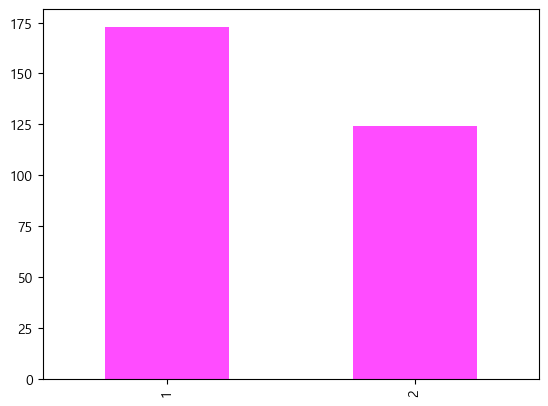

In [40]:
# 성별 비율 시각화
# 항목이 5개가 넘지 않기에 막대나 파이차트를 이용해보자.
university_gender['gender'].value_counts().plot.bar(color='magenta', alpha=0.7)

<Axes: >

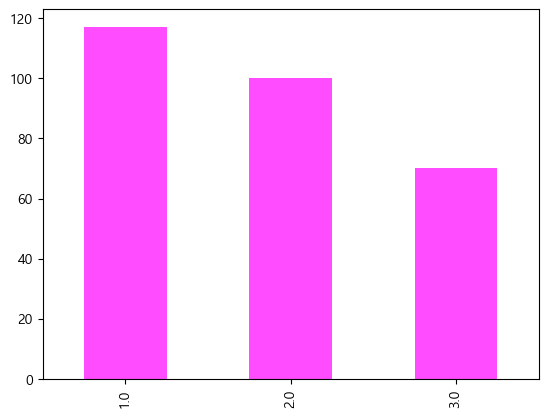

In [11]:
university['level'].value_counts()
university['level'].value_counts().plot.bar(color='magenta',alpha=0.7)

<Axes: ylabel='survey'>

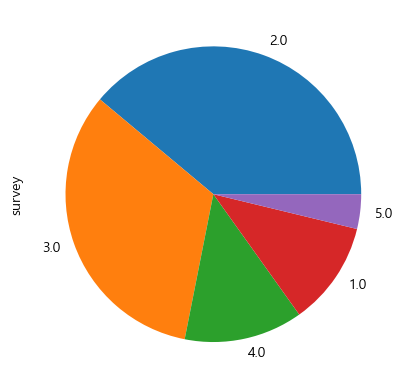

In [16]:
# 요약통계량
# survey는 등간 척도라서 요약 통계량과
# 구성 비율도 의미를 갖음
university_gender['survey'].describe()
# 주로 의미를 갖는것은 mean
university_gender['survey'].value_counts().plot.pie()

In [41]:
print(university_gender['cost'].describe())
# 값의 종류가 너무 많음
# 비율 척도가 직접 입력하는 형태가 되므로
# 이상치나 결측치의 발생 가능성이 높음
# UI를 만들 때, 다른 척도에 비해서 주의를 기울여야 합니다.
print(university_gender['cost'].value_counts())

count    268.000000
mean       8.754478
std       69.356480
min     -457.200000
25%        4.400000
50%        5.400000
75%        6.300000
max      675.000000
Name: cost, dtype: float64
 5.0      18
 6.3      16
 4.0      15
 6.0      14
 6.2      13
 6.4      11
 5.1      10
 5.2       9
 4.1       9
 6.1       8
 6.7       8
 5.5       8
 5.3       7
 5.7       6
 4.7       6
 3.0       6
 5.8       5
 4.3       5
 5.4       5
 3.5       5
 4.6       5
 6.8       4
 5.6       4
 4.4       4
 6.9       4
 6.5       4
 7.7       4
 4.9       4
 3.9       3
 7.0       3
 4.2       3
 3.8       3
 7.1       3
-235.8     2
 336.5     2
 2.3       2
 7.2       2
 7.9       2
 75.1      2
 115.7     2
 5.9       2
 85.1      2
 3.4       2
-5.9       2
 4.8       2
 3.3       2
-4.8       1
-345.6     1
 675.0     1
 225.8     1
-457.2     1
 1.0       1
-75.0      1
 2.1       1
 257.8     1
 4.5       1
Name: cost, dtype: int64


In [42]:
# 일반적인 생활비는 2 ~ 10 으로 설정
cost=university_gender['cost']
print(cost[(cost>=2)&(cost<=10)].describe())
print(cost[(cost>=2)&(cost<=10)].value_counts())

count    248.000000
mean       5.354032
std        1.138783
min        2.100000
25%        4.600000
50%        5.400000
75%        6.200000
max        7.900000
Name: cost, dtype: float64
5.0    18
6.3    16
4.0    15
6.0    14
6.2    13
6.4    11
5.1    10
4.1     9
5.2     9
5.5     8
6.1     8
6.7     8
5.3     7
3.0     6
5.7     6
4.7     6
4.6     5
4.3     5
5.8     5
5.4     5
3.5     5
5.6     4
6.9     4
4.9     4
6.5     4
4.4     4
6.8     4
7.7     4
3.8     3
3.9     3
7.0     3
4.2     3
7.1     3
3.4     2
3.3     2
7.2     2
5.9     2
4.8     2
2.3     2
7.9     2
2.1     1
4.5     1
Name: cost, dtype: int64


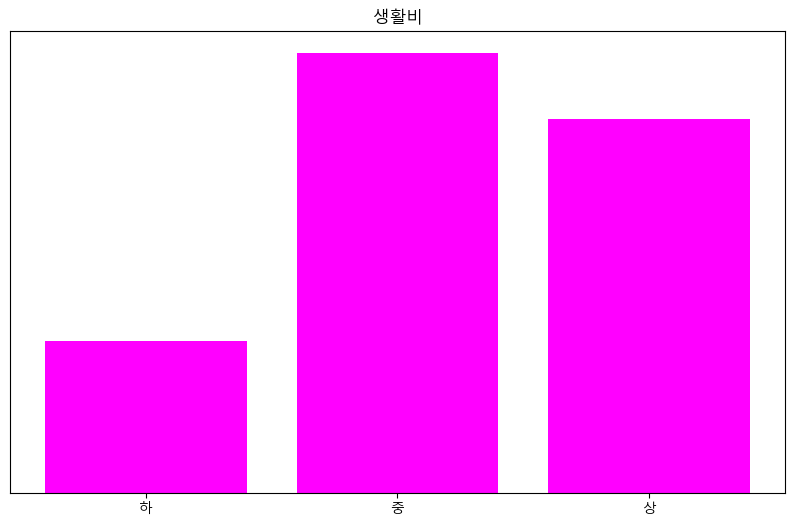

In [37]:
# 시각화 영역 크기 설정
plt.figure(figsize=(10,6))
ys,xs,patches=plt.hist(cost[(cost>=2)&(cost<=10)],
                      bins=3, #구간의 개수
                      density=True, # 백분율 설정
                      cumulative=False, # 누적 여부
                      histtype='bar', # bar, step 존재
                      orientation='vertical', # 방향
                      rwidth=0.8, # 너비
                      color='magenta')
# y축 레이블 제거
plt.yticks([])
# x축 레이블 추가
plt.xticks([(xs[i]+xs[i+1])/2 for i in range(0,len(xs)-1)],["하","중","상"])
plt.title('생활비')
plt.show()

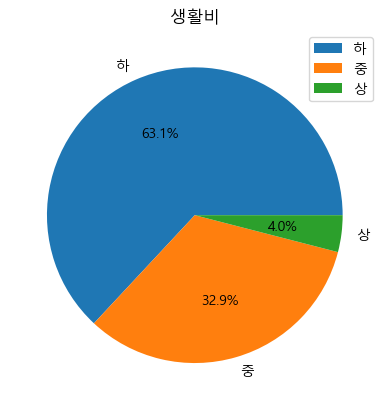

In [43]:
# 직접 구간화 작업을 수행하자
cost=cost[(cost>=1)&(cost<=10)]
cost[(cost>=1)&(cost<=3)]=1
cost[(cost>3)&(cost<=6)]=2
cost[(cost>6)&(cost<=10)]=3
cost=cost.astype(int)
plt.pie(cost.value_counts(), labels=["하","중","상"], autopct='%1.1f%%')
plt.title('생활비')
plt.legend()
plt.show()

In [45]:
import math
s=pd.Series([10,11,10.78])
# 산술 평균
print('평균 성장률', s.pct_change().mean())
print(10*1.040000000000000036*1.040000000000000036)
# 기하 평균
print('기하 평균 :', math.sqrt((11/10)*(10.78/11)))
print(10*1.0382677881933928*1.0382677881933928)

평균 성장률 0.040000000000000036
10.816
기하 평균 : 1.0382677881933928
10.78


In [49]:
# 절사 평균을 구하기 위해서 import
from scipy import stats
tdata=pd.read_csv('./data/tdata.csv', encoding='cp949')
# print(tdata)
print("평균 : ", tdata['성적'].mean())
print("중앙값 : ", tdata['성적'].median())
print("절사 평균 : ", stats.trim_mean(tdata['성적'],0.1))
# 평균과 절사평균이 큰 차이가 없다면, 
# 이상치의 영향을 크게 받는 것이 아니다.

평균 :  77.1
중앙값 :  77.5
절사 평균 :  77.0


In [56]:
# 주 이름, 인구수, 살인사건 발생률, 주 이름 약자 데이터
# population은 인구이고, Murder.Rate는 살인사건 발생률
# Murder.Rate의 평균을 바로 구하는 것은 인구에 대한 
# 가중치를 부여하지 않았기에 결과 왜곡의 가능성이 존재함
state=pd.read_csv('./data/state.csv')
#state.head()
print("평균 : ", state['Murder.Rate'].mean())
print("중앙값 : ", state['Murder.Rate'].median())
# 가중 중앙값과 가중 평균을 구해보자.
import wquantiles
print("인구 가중치를 부여한 평균 : ", np.average(state['Murder.Rate'],weights=state['Population']))
print("인구 가중치를 부여한 중앙값 : ", wquantiles.median(state['Murder.Rate'],weights=state['Population']))

평균 :  4.066
중앙값 :  4.0
인구 가중치를 부여한 평균 :  4.445833981123393
인구 가중치를 부여한 중앙값 :  4.4


0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64


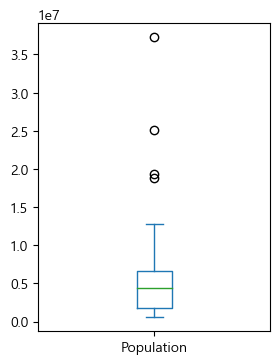

In [2]:
#4분위 수 와 백분위 수를 확인
state = pd.read_csv('./data/state.csv')
print(state['Murder.Rate'].quantile([0.05, 0.25, 0.50, 0.75, 0.95]))
#녹색 선이 50% 상자의 양 끝선이 25% 와 75% 에 해당하는 값
#수염의 끝은 하위 25%에서 (75%-25% * 1.5)을 뺀 값
#상위 75%에서 (75%-25% * 1.5)을 더한 값 값
#가장 일반적인 이상치 검사 방법이 수염 외부에 있는 값을 이상치로 간주하는 것
ax = (state['Population'].plot.box(figsize=(3, 4)))
plt.show()

In [3]:
#population을 10개의 그룹으로 분할 한 후 개수 구하기
binnedPopulation = pd.cut(state['Population'], 10)
#그룹 별로 데이터의 개수를 가지고 정렬해서 출력
#print(binnedPopulation.value_counts())
#각 구간에 속한 주 이름을 같이 출력

binnedPopulation.name = 'binnedPopulation'

#데이터 병합
df = pd.concat([state, binnedPopulation], axis=1)
#print(df)

#Population 순으로 데이터 정렬
df = df.sort_values(by='Population')
#print(df)

groups = []
#인구의 하한 과 상한으로 그룹화해서 필드를 생성
for group, subset in df.groupby(by = 'binnedPopulation'):
    groups.append({
        'BinRange': group,
        'Count': len(subset),
        'States': ','.join(subset.Abbreviation)
    })
print(pd.DataFrame(groups))

                   BinRange  Count  \
0    (526935.67, 4232659.0]     24   
1    (4232659.0, 7901692.0]     14   
2   (7901692.0, 11570725.0]      6   
3  (11570725.0, 15239758.0]      2   
4  (15239758.0, 18908791.0]      1   
5  (18908791.0, 22577824.0]      1   
6  (22577824.0, 26246857.0]      1   
7  (26246857.0, 29915890.0]      0   
8  (29915890.0, 33584923.0]      0   
9  (33584923.0, 37253956.0]      1   

                                              States  
0  WY,VT,ND,AK,SD,DE,MT,RI,NH,ME,HI,ID,NE,WV,NM,N...  
1          KY,LA,SC,AL,CO,MN,WI,MD,MO,TN,AZ,IN,MA,WA  
2                                  VA,NJ,NC,GA,MI,OH  
3                                              PA,IL  
4                                                 FL  
5                                                 NY  
6                                                 TX  
7                                                     
8                                                     
9                              

In [4]:
#상대 도수 와 누적 도수 출력
scores = pd.read_csv('./data/scores_em.csv', index_col = 'student number')
#print(scores)

#영어 점수 꺼내기
english_scores = np.array(scores['english'])
#0 ~ 100까지를 10개의 구간으로 나누어서 개수를 파악
freq, _ = np.histogram(english_scores, bins=10, range=(0,100))
#print(freq)

#0~10, 10~20 형태의 문자열 만들기
freq_class = [f'{i}~{i+10}' for i in range(0, 100, 10)]
#print(freq_class)

#문자열 과 데이터 개수를 가지고 DataFrame 만들기
freq_dist_df = pd.DataFrame({'빈도_수': freq}, 
                            index=pd.Index(freq_class, name='구간'))
#print(freq_dist_df)

#상대 도수 만들기
rel_freq = freq / freq.sum()
#print(rel_freq)

#누적 상대 도수 만들기
cum_rel_freq = np.cumsum(rel_freq)
#print(cum_rel_freq)

freq_dist_df['상대도수'] = rel_freq
freq_dist_df['누적상대도수'] = cum_rel_freq
print(freq_dist_df)

        빈도_수  상대도수  누적상대도수
구간                        
0~10       0  0.00    0.00
10~20      0  0.00    0.00
20~30      0  0.00    0.00
30~40      2  0.04    0.04
40~50      8  0.16    0.20
50~60     16  0.32    0.52
60~70     18  0.36    0.88
70~80      6  0.12    1.00
80~90      0  0.00    1.00
90~100     0  0.00    1.00


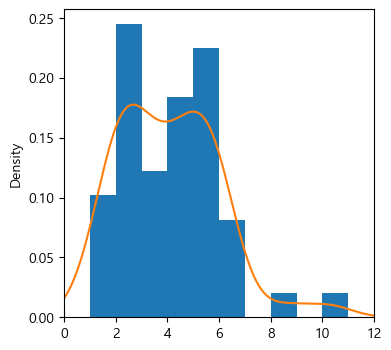

In [5]:
#히스토그램
ax = state['Murder.Rate'].plot.hist(density=True, xlim=[0, 12],
                                   bins=range(1, 12), figsize=(4, 4))
#밀도 추정 - 히스토그램보다 부드럽게 곡선으로 데이터의 분포를 시각화
state['Murder.Rate'].plot.density(ax=ax)
plt.show()

In [6]:
#교차 분석

university = pd.read_csv('./data/descriptive.csv')
#print(university.head())

#cost 열 제거
university.drop("cost", axis=1, inplace=True)
#print(university.head())

#gender 대신에 남자 여자로 변경한 컬럼을 추가
university['성별'] = '남자'
idx = 0
for val in university['gender']:
    if val == 2:
        university['성별'][idx] = '여자'
    idx = idx + 1
    
university.drop('gender', axis=1, inplace=True)
#print(university.head())

university['학력'] = '응답없음'
idx = 0
for val in university['level']:
    if val == 1.0:
        university['학력'][idx] = '고졸'
    elif val == 2.0:
        university['학력'][idx] = '대졸'
    elif val == 3.0:
        university['학력'][idx] = '대학원졸'
    idx = idx + 1
university.drop('level', axis=1, inplace=True)
#print(university.head())
        
university['합격여부'] = '응답없음'
idx = 0
for val in university['pass']:
    if val == 1.0:
        university['합격여부'] = '합격'
    elif val == 2.0:
        university['합격여부'] = '불합격'
university.drop('pass', axis=1, inplace=True)
#print(university.head())

#응답없음 제거
university = university[(university['학력'] == '고졸') | 
                        (university['학력'] == '대졸') | 
                        (university['학력'] == '대학원졸')]

#학력 과 성별에 대한 교차 분할표
print(pd.crosstab(university['학력'], university['성별']))

성별    남자  여자
학력          
고졸    67  50
대졸    60  40
대학원졸  42  28


C:\Users\USER\AppData\Local\Temp\ipykernel_16416\2830467148.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  university['성별'][idx] = '여자'
C:\Users\USER\AppData\Local\Temp\ipykernel_16416\2830467148.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  university['학력'][idx] = '고졸'
C:\Users\USER\AppData\Local\Temp\ipykernel_16416\2830467148.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  university['학력'][idx] = '대졸'
C:\Users\USER

C:\Users\USER\AppData\Local\Temp\ipykernel_16416\3415019005.py:11: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(mpg.corr())


                mpg  cylinders  displacement  weight  acceleration  \
mpg           1.000     -0.775        -0.804  -0.832         0.420   
cylinders    -0.775      1.000         0.951   0.896        -0.505   
displacement -0.804      0.951         1.000   0.933        -0.544   
weight       -0.832      0.896         0.933   1.000        -0.417   
acceleration  0.420     -0.505        -0.544  -0.417         1.000   
model year    0.579     -0.349        -0.370  -0.307         0.288   
origin        0.563     -0.563        -0.609  -0.581         0.206   

              model year  origin  
mpg                0.579   0.563  
cylinders         -0.349  -0.563  
displacement      -0.370  -0.609  
weight            -0.307  -0.581  
acceleration       0.288   0.206  
model year         1.000   0.181  
origin             0.181   1.000  


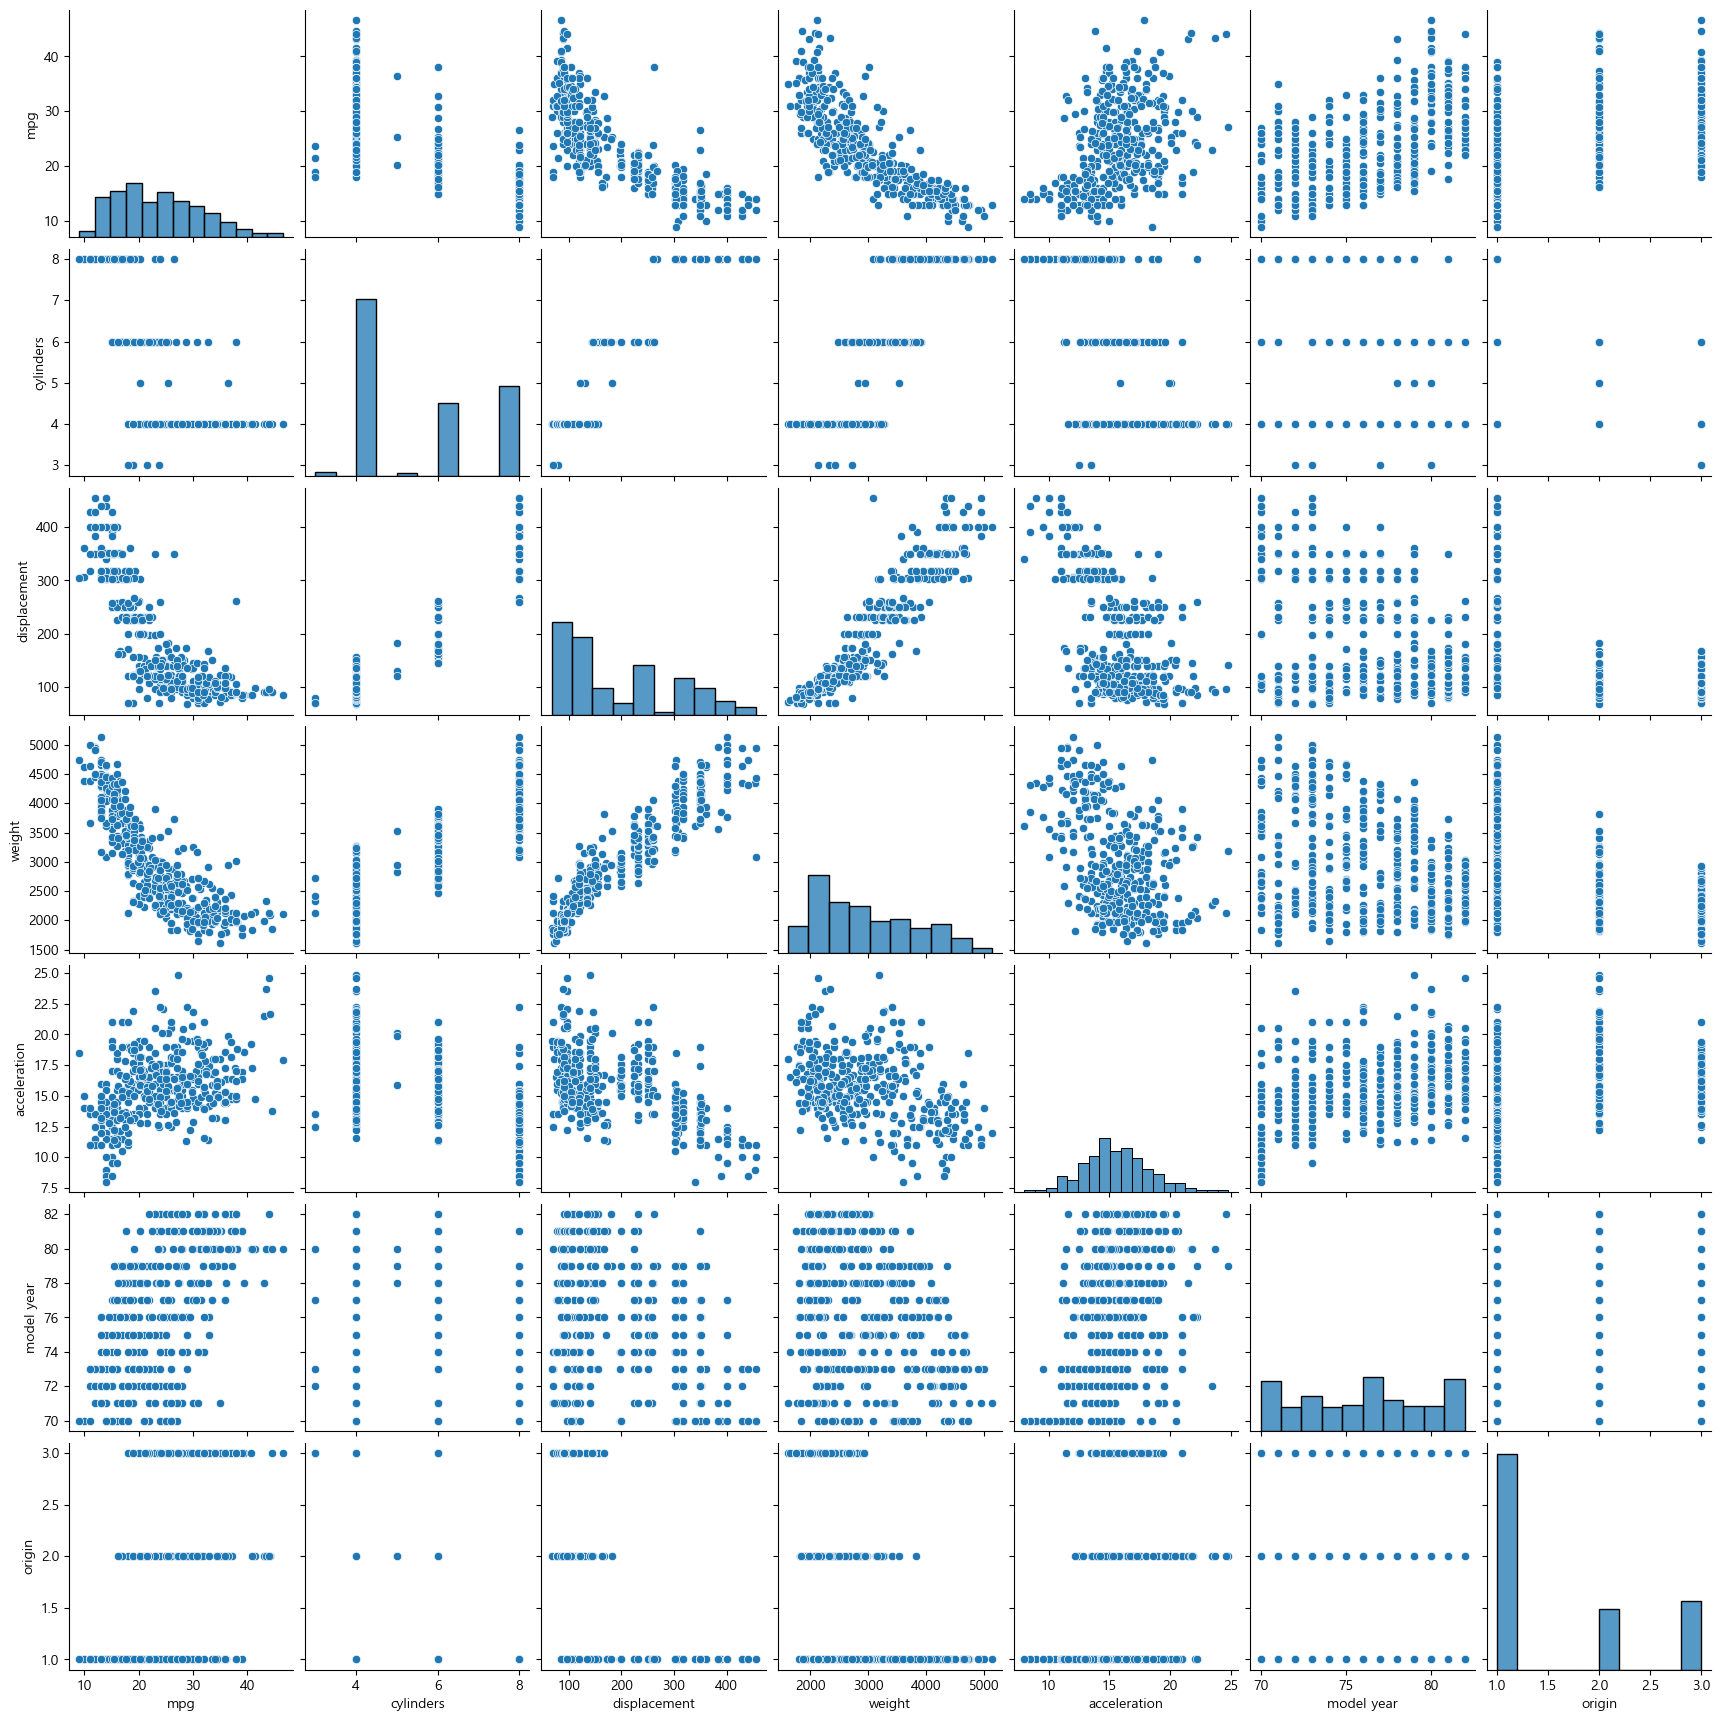

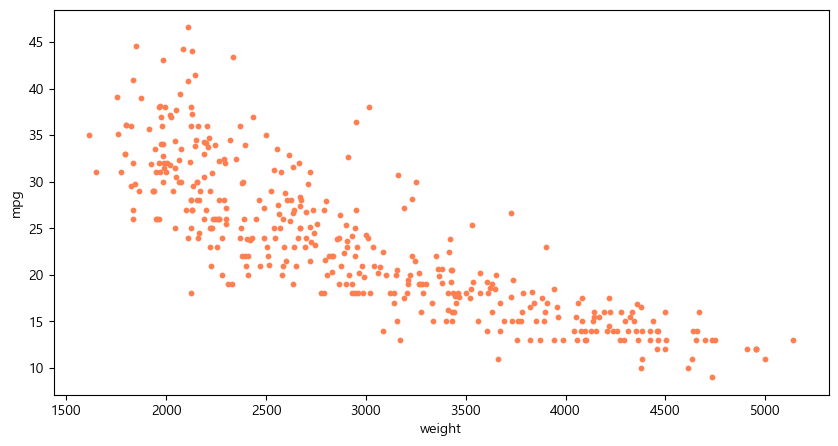

                mpg  cylinders  displacement  horsepower  weight  \
mpg           1.000     -0.778        -0.805      -0.778  -0.832   
cylinders    -0.778      1.000         0.951       0.843   0.898   
displacement -0.805      0.951         1.000       0.897   0.933   
horsepower   -0.778      0.843         0.897       1.000   0.865   
weight       -0.832      0.898         0.933       0.865   1.000   
acceleration  0.423     -0.505        -0.544      -0.689  -0.417   
model year    0.581     -0.346        -0.370      -0.416  -0.309   
origin        0.565     -0.569        -0.615      -0.455  -0.585   

              acceleration  model year  origin  
mpg                  0.423       0.581   0.565  
cylinders           -0.505      -0.346  -0.569  
displacement        -0.544      -0.370  -0.615  
horsepower          -0.689      -0.416  -0.455  
weight              -0.417      -0.309  -0.585  
acceleration         1.000       0.290   0.213  
model year           0.290       1.000   0.1

C:\Users\USER\AppData\Local\Temp\ipykernel_16416\3415019005.py:38: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(mpg.corr())


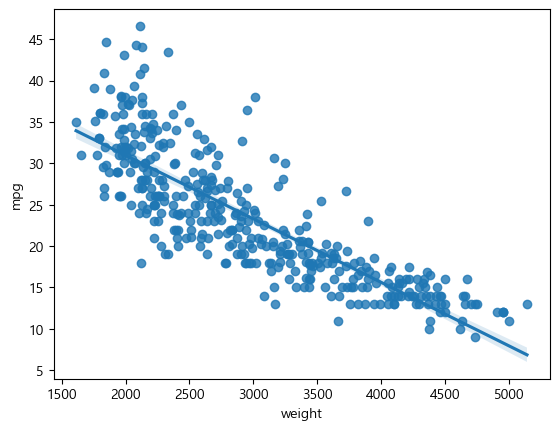

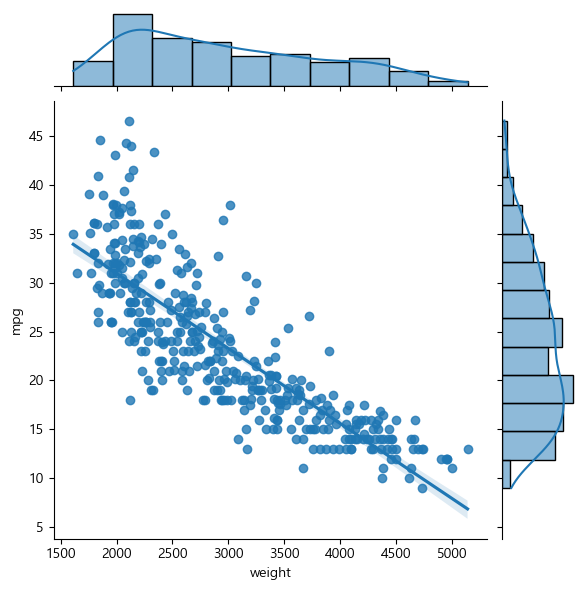

In [7]:
mpg = pd.read_csv('./data/auto-mpg.csv', header=None)
mpg.columns = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
              'acceleration', 'model year', 'origin', 'name']
#print(mpg.head(5))
#모든 컬럼에 대한 산점도 그리기
import seaborn as sns
sns.pairplot(mpg)


#모든 숫자 컬럼의 상관 계수 확인
print(mpg.corr())

#이 경우 mpg 에 대한 회귀 분석을 할 때는 차원 축소나 제거를 고려
#cylinders 와 displacement 가 상관 계수가 높아서 아주 강한 상관 관계를 가지고 있음
#상관 관계를 가지고 있는 feature 들을 이용해서 분석을 하게 되면 
#다중 공선성 문제가 불거지게 됩니다.

mpg.plot(kind='scatter', x='weight', y='mpg', c='coral', s=10, figsize=(10, 5))
plt.show()

#회귀선 과 분포를 함께 확인
sns.regplot(x='weight', y='mpg', data=mpg)

#회귀선 과 분포를 함께 확인
sns.jointplot(x='weight', y='mpg', kind='reg',  data=mpg)

#print(mpg.corr()) 
#모든 숫자 컬럼의 상관 계수를 구하는데 horsepower는 나오지 않음
#이런 경우 자료형 확인 - horsepower 가 object 타입
#print(mpg.info())

#print(mpg['horsepower'].unique())

mpg['horsepower'].replace('?', np.nan, inplace=True)
mpg.dropna(subset=['horsepower'], axis=0, inplace=True)
mpg['horsepower'] = mpg['horsepower'].astype('float')

print(mpg.corr())

#상관 계수 와 유의 확률을 같이 확인
#유의 확률: 우연히 이렇게 나올 확률
#이 확률이 낮으면 신뢰할 수 있는 값
#일반적으로 사용하는 값은 0.1, 0.05, 0.01

import scipy as sp
result = sp.stats.pearsonr(mpg['mpg'].values, mpg['horsepower'].values)
print(result)
#statistic=-0.7784267838977761, pvalue=7.031989029403434e-81
#유의확률이 0.01 보다 현저하게 적으므로 이 결과는 신뢰할 만 합니다.

       x1     y1
x1  1.000  0.816
y1  0.816  1.000
       x2     y2
x2  1.000  0.816
y2  0.816  1.000
       x3     y3
x3  1.000  0.816
y3  0.816  1.000
       x4     y4
x4  1.000  0.817
y4  0.817  1.000
PearsonRResult(statistic=0.8164205163448399, pvalue=0.0021696288730787927)
PearsonRResult(statistic=0.8162365060002427, pvalue=0.0021788162369108027)
PearsonRResult(statistic=0.8162867394895982, pvalue=0.002176305279228025)
PearsonRResult(statistic=0.8165214368885029, pvalue=0.002164602347197218)


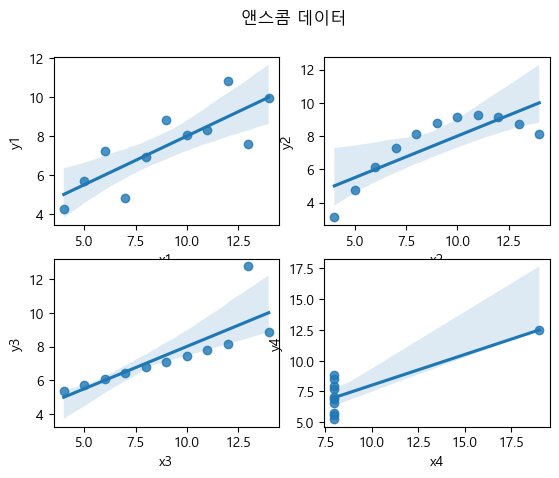

In [8]:
#앤스콤 데이터 가져오기
import statsmodels.api as sm
data = sm.datasets.get_rdataset("anscombe")
df = data.data
#데이터 확인
#print(df)

#4개의 상관 계수가 동일
print(df[['x1', 'y1']].corr())
print(df[['x2', 'y2']].corr())
print(df[['x3', 'y3']].corr())
print(df[['x4', 'y4']].corr())

result = sp.stats.pearsonr(df['x1'].values, df['y1'].values)
print(result)
result = sp.stats.pearsonr(df['x2'].values, df['y2'].values)
print(result)
result = sp.stats.pearsonr(df['x3'].values, df['y3'].values)
print(result)
result = sp.stats.pearsonr(df['x4'].values, df['y4'].values)
print(result)


plt.subplot(221)
sns.regplot(x='x1', y='y1', data=df)
plt.subplot(222)
sns.regplot(x='x2', y='y2', data=df)
plt.subplot(223)
sns.regplot(x='x3', y='y3', data=df)
plt.subplot(224)
sns.regplot(x='x4', y='y4', data=df)
plt.suptitle("앤스콤 데이터")
plt.show()

In [9]:
s1 = pd.Series([1, 2, 3, 4, 5, 6])
s2 = pd.Series([1, 8, 27, 64, 125, 216])

p1 = pd.Series([1, 2, 3, 4, 5, 6])
p2 = pd.Series([1, 1, 2, 3, 5, 8])
print("피어슨 상관 계수:", s1.corr(s2))
print("피어슨 상관 계수:", p1.corr(p2))
print("피어슨 상관 계수:", sp.stats.pearsonr(s1, s2))

print("스피어만 상관 계수:", s1.corr(s2, method='spearman'))
print("스피어만 상관 계수:", p1.corr(s2, method='spearman'))
print("스피어만 상관 계수:", sp.stats.spearmanr(s1, s2))

피어슨 상관 계수: 0.9379313244517968
피어슨 상관 계수: 0.9389529557231421
피어슨 상관 계수: PearsonRResult(statistic=0.9379313244517968, pvalue=0.005659220304470507)
스피어만 상관 계수: 1.0
스피어만 상관 계수: 1.0
스피어만 상관 계수: SignificanceResult(statistic=1.0, pvalue=0.0)


In [10]:
s1 = pd.Series([1, 2, 3, 4, 5, 6])
s2 = pd.Series([1, 8, 27, 64, 125, 216])
print("피어슨 상관 계수:", s1.corr(s2))
print("피어슨 상관 계수:", sp.stats.pearsonr(s1, s2))
print("켄달 상관 계수:", s1.corr(s2, method='kendall'))
print("켄달 상관 계수:", sp.stats.kendalltau(s1, s2))

피어슨 상관 계수: 0.9379313244517968
피어슨 상관 계수: PearsonRResult(statistic=0.9379313244517968, pvalue=0.005659220304470507)
켄달 상관 계수: 0.9999999999999999
켄달 상관 계수: SignificanceResult(statistic=0.9999999999999999, pvalue=0.002777777777777778)


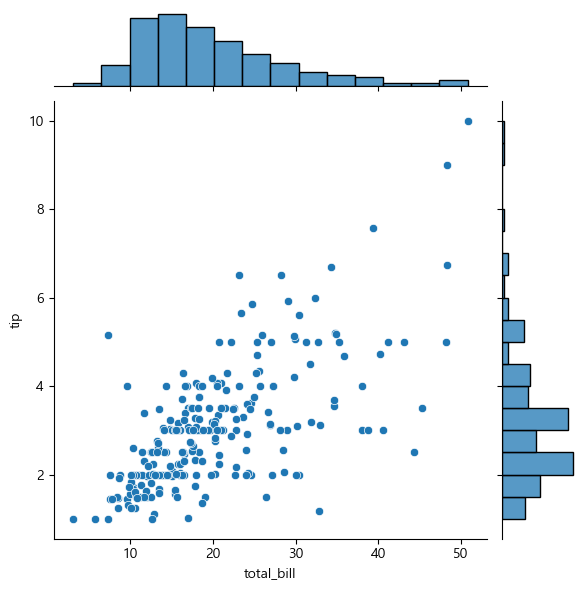

In [11]:
#산점도
tips = sns.load_dataset('tips')
sns.jointplot(x='total_bill', y='tip', data=tips, kind='scatter')

(498249, 3)
(432693, 3)


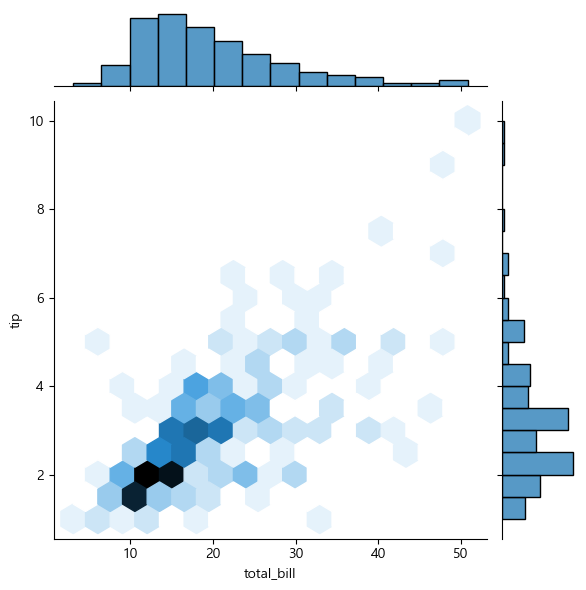

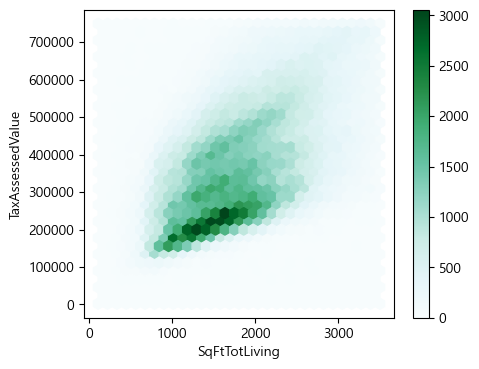

In [12]:
sns.jointplot(x='total_bill', y='tip', data=tips, kind='hex')

kc_tax = pd.read_csv('./data/kc_tax.csv.gz')
print(kc_tax.shape)
kc_tax0 = kc_tax.loc[(kc_tax['TaxAssessedValue'] < 750000) & 
                    (kc_tax['SqFtTotLiving'] > 100) &
                    (kc_tax['SqFtTotLiving'] < 3500)]
print(kc_tax0.shape)
ax = kc_tax0.plot.hexbin(x='SqFtTotLiving', y='TaxAssessedValue',
                        gridsize=30, sharex=False, figsize=(5, 4))
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(4, 4))
sns.kdeplot(data=kc_tax0, x = 'SqFtTotLiving', y='TaxAssessedValue', ax=ax)
plt.show()